<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

### **Задание 0**
Для чего фиксируем сиды в домашках?

`Your answer here`

Чтобы при генерировании чего-то случайнго у всех получалось одинваковое :))

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [170]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [95]:
# your code here
from ydata_profiling import ProfileReport
for name in df_train.columns:
    a=len(df_train.index[df_train[name].isna()].tolist())
    if a>0:
        print(f'В столбце {name} есть пропуски.')


a=df_train.duplicated()
b=[i for i in range(len(a)) if a[i]==True]

if len(b)>0:
    print(f'В датафрейме есть {len(b)} дубликатов.')
else:
     print(f'В датафрейме нет дубликатов.')


profile_report = ProfileReport(df_train, title='Pandas Profiling Report')
profile_report



В столбце mileage есть пропуски.
В столбце engine есть пропуски.
В столбце max_power есть пропуски.
В столбце torque есть пропуски.
В столбце seats есть пропуски.
В датафрейме есть 985 дубликатов.


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

В данных 4 категориальных переменных: 
1) fuel, принимающая 4 значения. Причем основное число наблюдений сосредточено на двух значениях (Diesel и Petrol). То есть по этому признаку наблюдается дисбаланс;
2) seller_type, принимающая з значения, где основное число наблюдений сосредоточено на одном значении переменной: individual;
3) transmission, принимиающая 2 значения, большая часть наблюдений приходится на одно значение Manual;
4) owner, принимающая 5 значений, где основное число наблюдений сосредоточено на первых двух значениях. 


Есть текстовые переменные, которые могут быть трансформированы в численные: mileage,max_power, а также те, по которым 120 и 100 уникальных значений (engine и torque соответственно).

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [171]:
# your code here

print('Численные признаки, train.')
print(df_train.select_dtypes(include=['number']).describe())

print('Численные признаки, test.')
print(df_test.select_dtypes(include=['number']).describe())

print('Категориальные признаки, train.')
print(df_train.select_dtypes(include=['category', 'object']).describe())

print('Категориальные признаки, test.')
print(df_test.select_dtypes(include=['category', 'object']).describe())

Численные признаки, train.
              year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000
Численные признаки, test.
              year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+0

Порядок среднего и медианы для численных признаков на тестововой и трейновой выборке в целом одинаковы, то есть выборки сбалансированы. 

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [172]:
# your code here


a=df_train.loc[:, df_train.columns != 'selling_price'].duplicated()
b=[i for i in range(len(a)) if a[i]==True]

print(f'В датафрейме {len(b)} повторяющихся строк с признаками')

df_train.loc[b, :]



В датафрейме 1159 повторяющихся строк с признаками


name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
254       35000  Petrol  Individual       Manual   First Owner   18.9 kmpl   
258       50000  Petrol  Individual       Manual  Second Owner   18.6 kmpl   
268       70000  Petrol  Individual       Manual  Second Owner   19.1 kmpl   
324        9000  Diesel      Dealer    Automatic   First Owner   13.6 kmpl   
325       20000  Petrol      Dealer    Automatic   First Owner  22.37 kmpl   
...         ...     ...         ...          ...           ...         ...   
6947      60000  Petrol  Individual       Manual  Second Owner   18.0 kmpl   
6984      24000  Diesel  Individual       Manual   First Owner   24.4 kmpl   
6989      50000  Diesel  Individual       Manual   First Owner  26.59 kmpl   
6997      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   
6998      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   

       engine   max_power               torque  seats  
254   1197 CC      82 bhp       114Nm@ 4000rpm    5.0  
258   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
268   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
324   1999 CC     177 bhp  430Nm@ 1750-2500rpm    5.0  
325   2487 CC  214.56 bhp  202Nm@ 3600-5200rpm    5.0  
...       ...         ...                  ...    ...  
6947   995 CC      62 bhp      90.3Nm@ 4200rpm    5.0  
6984  1498 CC   98.63 bhp  215Nm@ 1750-3000rpm    5.0  
6989  1248 CC      74 bhp       190Nm@ 2000rpm    5.0  
6997  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  
6998  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  

[1159 rows x 13 columns]

In [173]:
df_train=df_train.drop_duplicates(keep='first')


subset_columns = df_train.columns.difference(['selling_price']).tolist()

df_train = df_train.drop_duplicates(subset=subset_columns, keep='first')


df_train.reset_index(drop=True, inplace=True)

In [174]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [175]:
# your code here


df_train['mileage'] = df_train['mileage'].str[:-5].astype(float)
df_train['engine'] = df_train['engine'].str[:-3].astype(float)
df_train['max_power'] = df_train['max_power'].str[:-4]
df_train['max_power']=df_train.loc[df_train['max_power']!='', ['max_power'] ].astype(float)


In [177]:
#pd.set_option('display.max_rows', None)  # Или используйте какое-либо другое большое число

pd.set_option('display.max_rows', 10)  # Вернуть к стандартному значению


# Показать только столбец 'B'
print(df_train['torque'])

0                  190Nm@ 2000rpm
1             250Nm@ 1500-2500rpm
2        22.4 kgm at 1750-2750rpm
3           11.5@ 4,500(kgm@ rpm)
4               113.75nm@ 4000rpm
                  ...            
5835              96.1Nm@ 3000rpm
5836                90Nm@ 3500rpm
5837             113.7Nm@ 4000rpm
5838    24@ 1,900-2,750(kgm@ rpm)
5839               190Nm@ 2000rpm
Name: torque, Length: 5840, dtype: object


In [178]:

df_train['kgm'] = df_train['torque'].str.contains('kgm', na=False).astype(int)
df_test['kgm'] = df_test['torque'].str.contains('kgm', na=False).astype(int)

In [179]:

df_train['kgm']=df_train['kgm'].apply(lambda x: 1 if x==0  else 9.8)
df_test['kgm']=df_test['kgm'].apply(lambda x: 1 if x==0  else 9.8)

In [180]:

df_train['torque'] = df_train['torque'].str.replace(',', '', regex=False)
df_test['torque'] = df_test['torque'].str.replace(',', '', regex=False)

In [181]:
import re
df_train=df_train.drop_duplicates(keep='first')


subset_columns = df_train.columns.difference(['selling_price']).tolist()

df_train = df_train.drop_duplicates(subset=subset_columns, keep='first')


df_train.reset_index(drop=True, inplace=True)

df_train['mileage'] = df_train['mileage'].str[:-5].astype(float)
df_train['engine'] = df_train['engine'].str[:-3].astype(float)
df_train['max_power'] = df_train['max_power'].str[:-4]
df_train['max_power']=df_train.loc[df_train['max_power']!='', ['max_power'] ].astype(float)

df_train['kgm'] = df_train['torque'].str.contains('kgm', na=False).astype(int)
df_test['kgm'] = df_test['torque'].str.contains('kgm', na=False).astype(int)
df_train['kgm']=df_train['kgm'].apply(lambda x: 1 if x==0  else 9.8)
df_test['kgm']=df_test['kgm'].apply(lambda x: 1 if x==0  else 9.8)
df_train['torque'] = df_train['torque'].str.replace(',', '', regex=False)
df_test['torque'] = df_test['torque'].str.replace(',', '', regex=False)
def replace_non_numeric(torque_str):
    if pd.isna(torque_str):
        return torque_str  # Оставляем NaN как есть
    return re.sub(r'[^0-9.]', 'a', torque_str)

#df=df_train
# Применяем функцию к столбцу torque
df_train['cleaned_torque'] = df_train['torque'].apply(replace_non_numeric)
df_test['cleaned_torque'] = df_test['torque'].apply(replace_non_numeric)


def extract_values(value_str):
    if pd.isna(value_str):
        return value_str  # О
    # Извлекаем все числа из строки
    numbers = re.findall(r'\d*\.\d+|\d+', value_str)
    
    if not numbers:
        return None, None

    # Преобразуем извлеченные числа в float
    numbers = list(map(float, numbers))

    # Первый элемент
    first_value = numbers[0]

    # Если есть только два значения, возвращаем их
    if len(numbers) == 2:
        second_value = numbers[1]
    # Если есть три значения, возвращаем среднее из второго и третьего
    elif len(numbers) == 3:
        second_value = (numbers[1] + numbers[2]) / 2
    else:
        second_value = None  # Если значений не хватает, возвращаем None

    return first_value, second_value


# Применяем функцию к столбцу values и создаём новые столбцы
df_train[['torque', 'max_torque_rpm']] = df_train['cleaned_torque'].apply(extract_values).apply(pd.Series)
df_test[['torque', 'max_torque_rpm']] = df_test['cleaned_torque'].apply(extract_values).apply(pd.Series)



In [182]:

df_train.drop('cleaned_torque', axis=1, inplace=True)
df_test.drop('cleaned_torque', axis=1, inplace=True)

In [183]:

df_train['torque']=df_train['torque']*df_train['kgm']
df_test['torque']=df_test['torque']*df_test['kgm']

In [184]:

df_train.drop('kgm', axis=1, inplace=True)
df_test.drop('kgm', axis=1, inplace=True)

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [185]:
# your code here

df_train[df_train.select_dtypes(include='number').columns] = df_train.select_dtypes(include='number').fillna(df_train[df_train.select_dtypes(include='number').columns].median())
medians = df_train[df_train.select_dtypes(include='number').columns].median()
df_test[df_test.select_dtypes(include='number').columns] = df_test.select_dtypes(include='number').fillna(medians)


In [186]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   float64
 10  max_power       5840 non-null   float64
 11  torque          5840 non-null   float64
 12  seats           5840 non-null   float64
 13  max_torque_rpm  5840 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 638.9+ KB


In [187]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1000 non-null   object 
 1   year            1000 non-null   int64  
 2   selling_price   1000 non-null   int64  
 3   km_driven       1000 non-null   int64  
 4   fuel            1000 non-null   object 
 5   seller_type     1000 non-null   object 
 6   transmission    1000 non-null   object 
 7   owner           1000 non-null   object 
 8   mileage         1000 non-null   float64
 9   engine          1000 non-null   float64
 10  max_power       1000 non-null   float64
 11  torque          1000 non-null   float64
 12  seats           1000 non-null   float64
 13  max_torque_rpm  1000 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 109.5+ KB


По тренировочным данным для `train` и `test` лучше, чтобы информация из теста не перетекла на тренировучную выборку.

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [188]:
# your code here

df_train['engine']=df_train['engine'].astype(int)
df_train['seats']=df_train['seats'].astype(int)

df_test['engine']=df_test['engine'].astype(int)
df_test['seats']=df_test['seats'].astype(int)

In [192]:
df_train['seats'].unique()

array([ 5,  4,  7,  8,  6,  9, 10, 14,  2])

`Your answer here`
Мы можем рассматривать переменную seats как категориальную, потому что для данного признака  9 уникальных значений.

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [196]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power       torque        seats  max_torque_rpm  
count  5840.000000  5840.000000  5840.000000     5840.000000  
mean     87.948422   175.549296     5.426712     2846.153228  
std      31.577884   116.879534     0.982344      973.350814  
min      32.800000    14.900000     2.000000     1269.350000  
25%      68.000000   111.720000     5.000000     2000.000000  
50%      81.860000   160.000000     5.000000     2400.000000  
75%      99.000000   200.000000     5.000000     3750.000000  
max     400.000000  3724.000000    14.000000    21800.000000

Численные признаки, train, до заполнения.
|               |       year |      selling_price |      km_driven |     seats |
|---------------|------------|--------------------|----------------|-----------|
| count         |  6999.0000 |  6.999000e+03      |  6.999000e+03  |  6797.0000|
| mean          |  2013.8184 |  6.395152e+05      |  6.958462e+04  |    5.4190 |
| std           |    4.0531  |  8.089419e+05      |  5.772400e+04  |    0.9658 |
| min           | 1983.0000  |  2.999900e+04      |  1.000000e+00  |    2.0000 |
| 25%           | 2011.0000  |  2.549990e+05      |  3.500000e+04  |    5.0000 |
| 50%           | 2015.0000  |  4.500000e+05      |  6.000000e+04  |    5.0000 |
| 75%           | 2017.0000  |  6.750000e+05      |  9.700000e+04  |    5.0000 |
| max           | 2020.0000  |  1.000000e+07      |  2.360457e+06  |   14.0000 |



 

`Your answer here`

Да, медианы и средние значения моменялись после удаления дубликатов и заполнения пропусков, то есть распредление немного поменялось.

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

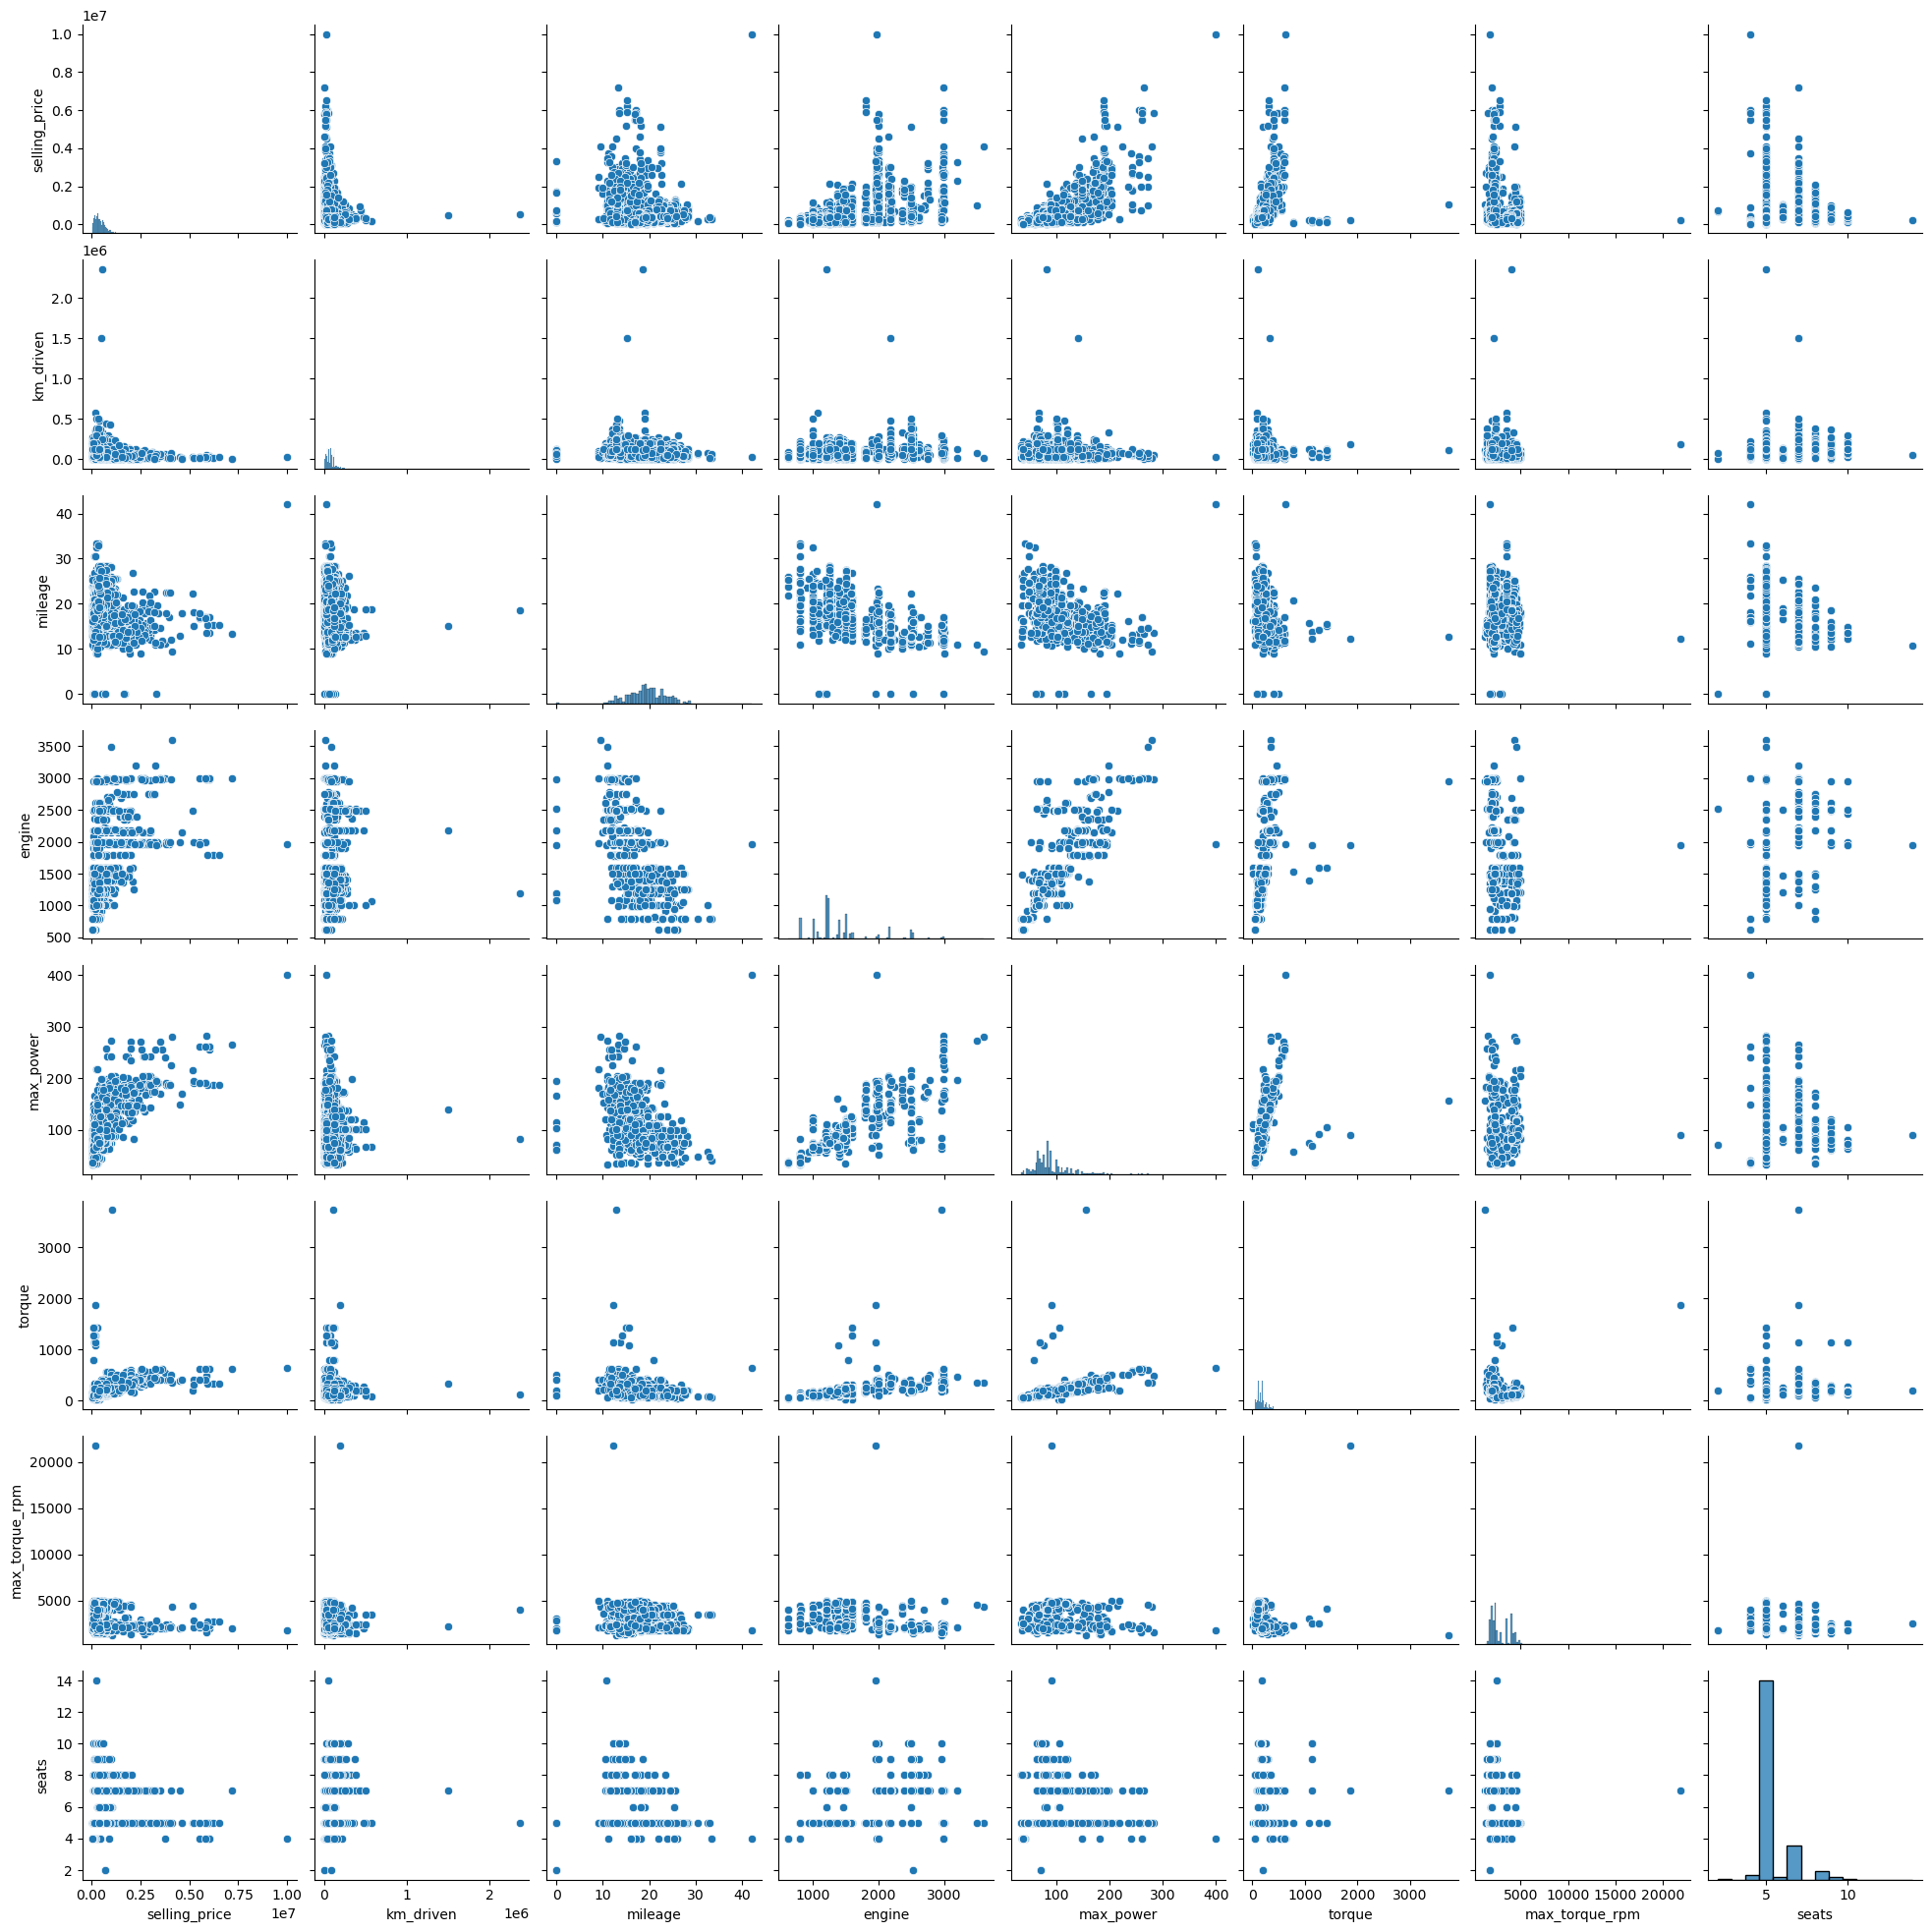

In [205]:
# your code here
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_train.loc[:, ['selling_price', 'km_driven', 'mileage', 'engine','max_power', 'torque', 'max_torque_rpm', 'seats']] )
plt.show()

Наибольшая связь целевой переменной отмечается с переменными km_driven(-), engine(+), max_power(+), torque(+). В скобках прелполагаемый знак корреляции.

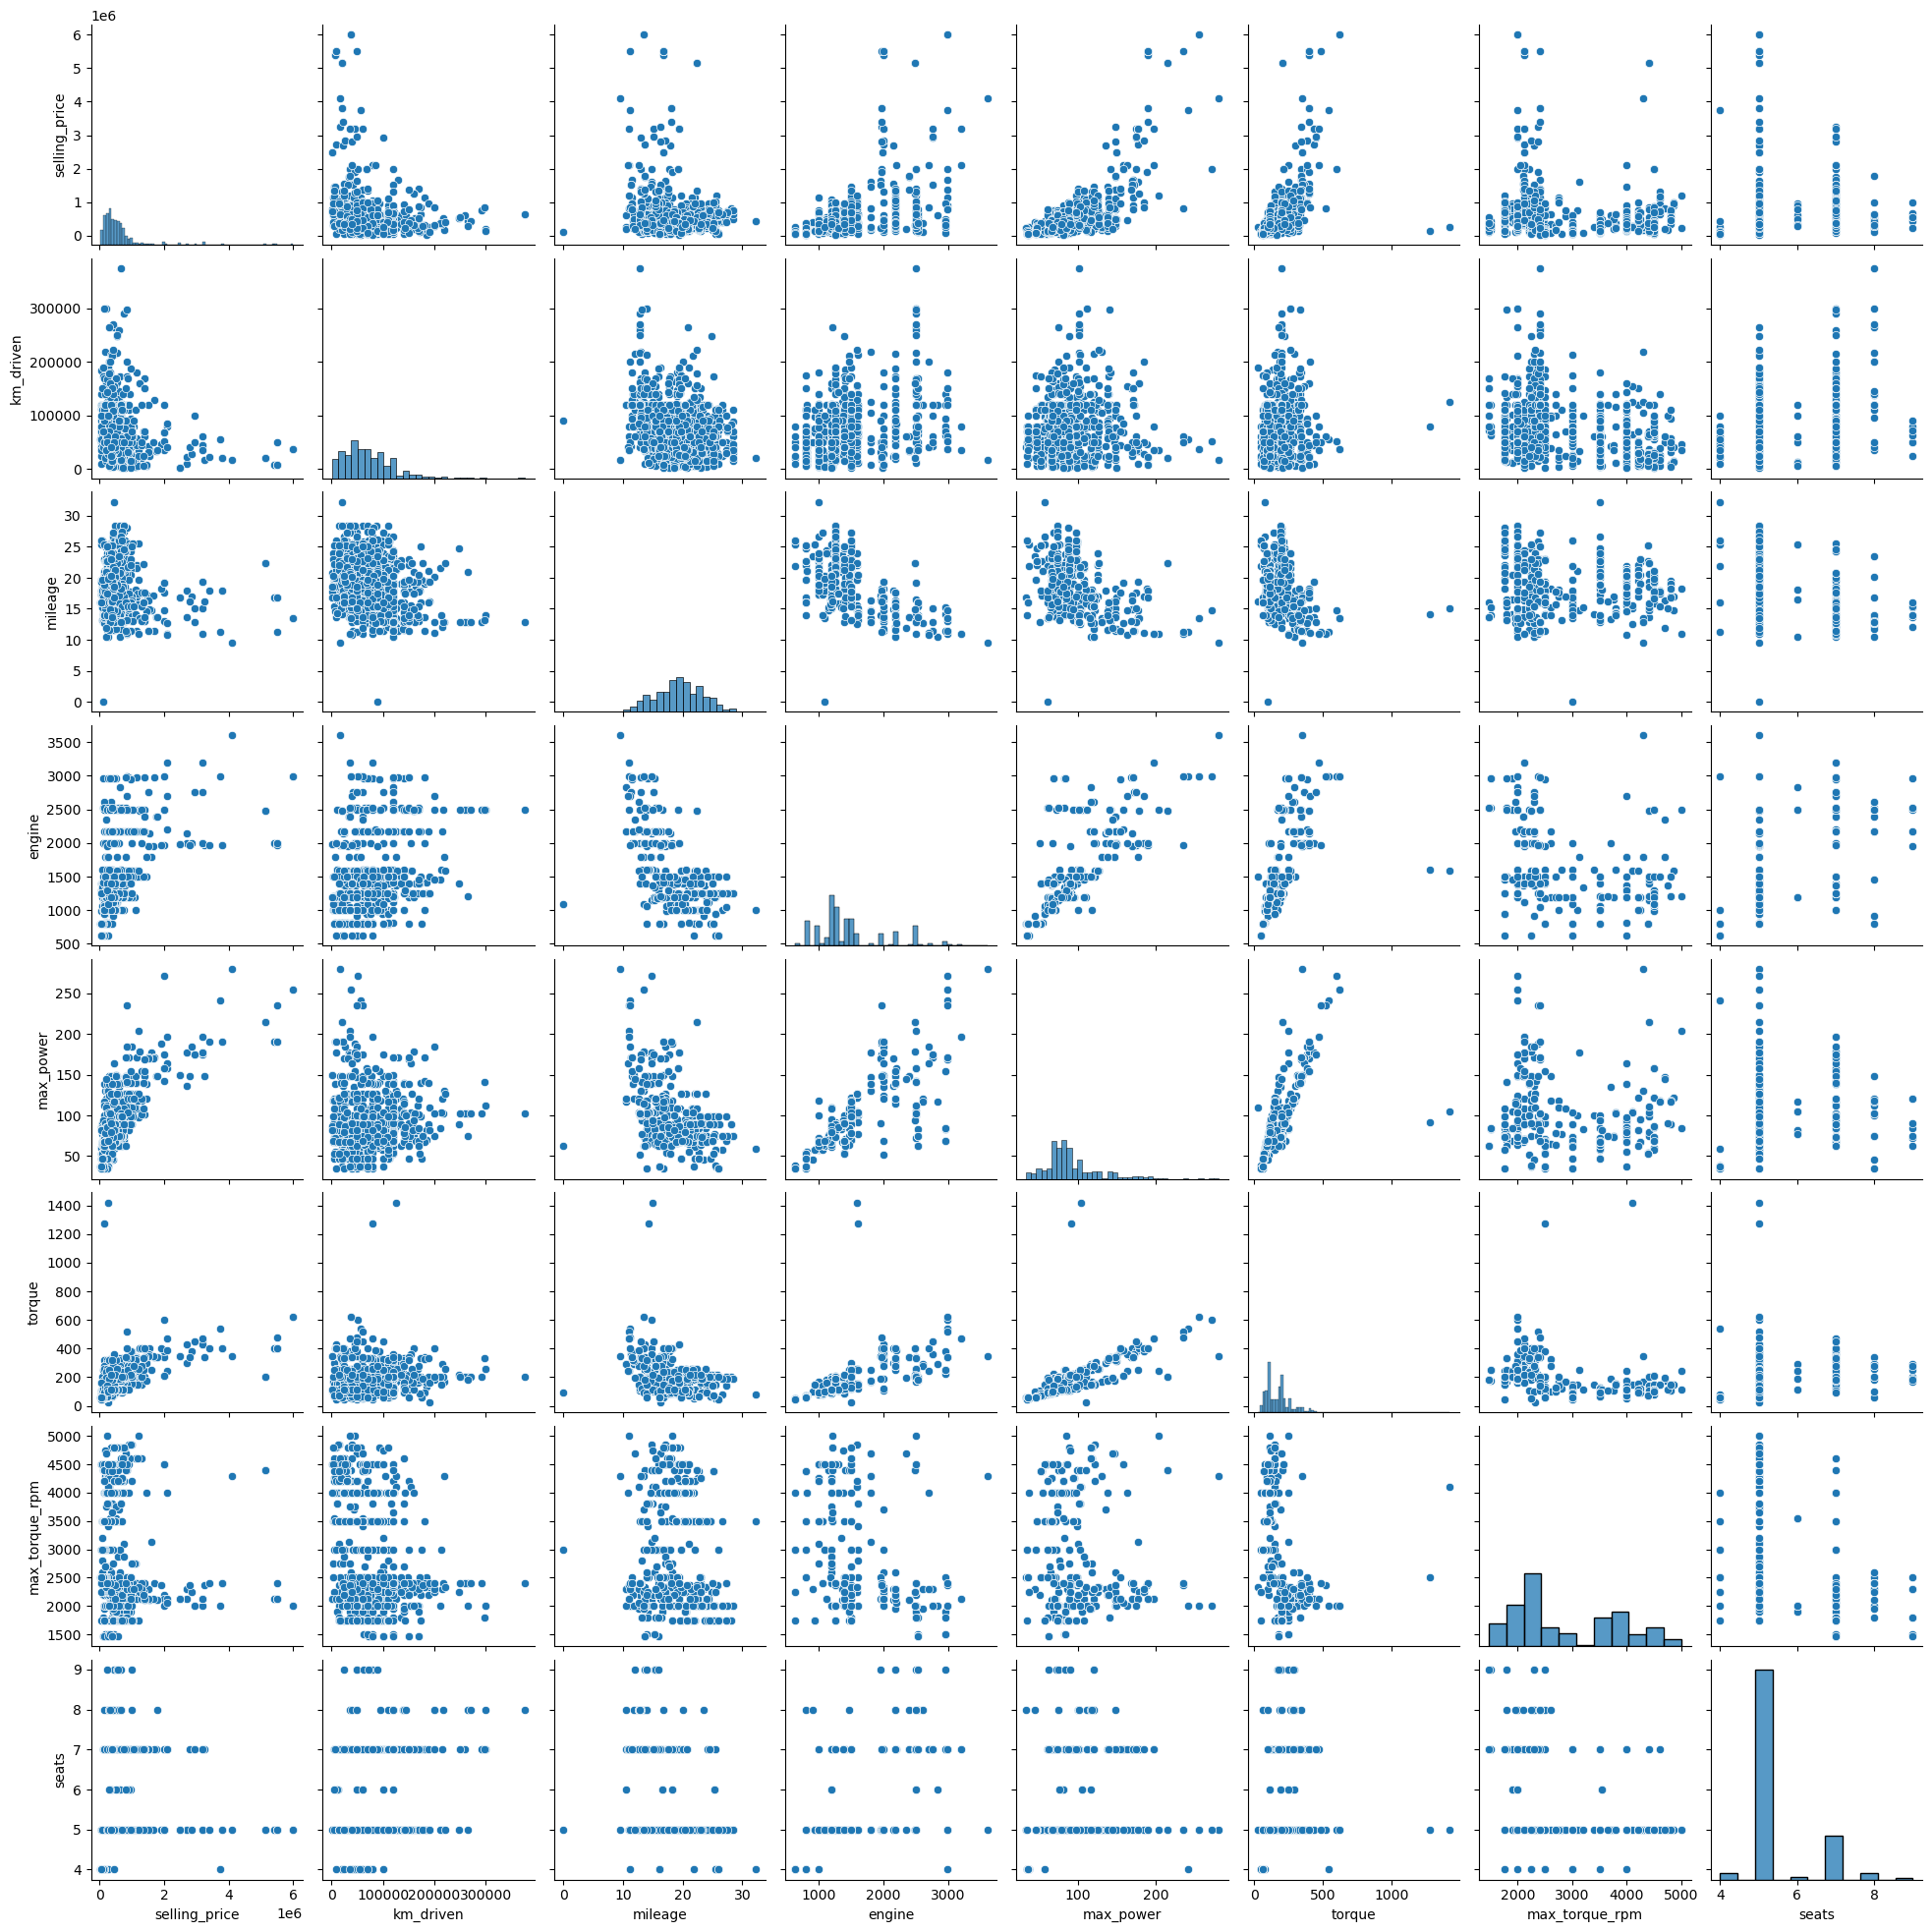

In [206]:
# your code here
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_test.loc[:, ['selling_price', 'km_driven', 'mileage', 'engine','max_power', 'torque', 'max_torque_rpm', 'seats']] )
plt.show()

да, в целом соокупности оказались похоими.

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

In [ ]:
# your code here

df_train.loc[:,  ['selling_price', 'km_driven', 'mileage', 'engine','max_power', 'torque', 'max_torque_rpm', 'seats']].corr()


selling_price  km_driven   mileage    engine  max_power  \
selling_price        1.000000  -0.164828 -0.104769  0.447672   0.693742   
km_driven           -0.164828   1.000000 -0.182086  0.229766   0.024539   
mileage             -0.104769  -0.182086  1.000000 -0.572893  -0.374150   
engine               0.447672   0.229766 -0.572893  1.000000   0.681968   
max_power            0.693742   0.024539 -0.374150  0.681968   1.000000   
torque               0.434123   0.105175 -0.223322  0.564910   0.614435   
max_torque_rpm      -0.175713  -0.230966 -0.094824 -0.381358  -0.152786   
seats                0.149953   0.192328 -0.451059  0.652172   0.244017   

                  torque  max_torque_rpm     seats  
selling_price   0.434123       -0.175713  0.149953  
km_driven       0.105175       -0.230966  0.192328  
mileage        -0.223322       -0.094824 -0.451059  
engine          0.564910       -0.381358  0.652172  
max_power       0.614435       -0.152786  0.244017  
torque          1.000000       -0.342486  0.299120  
max_torque_rpm -0.342486        1.000000 -0.293464  
seats           0.299120       -0.293464  1.000000

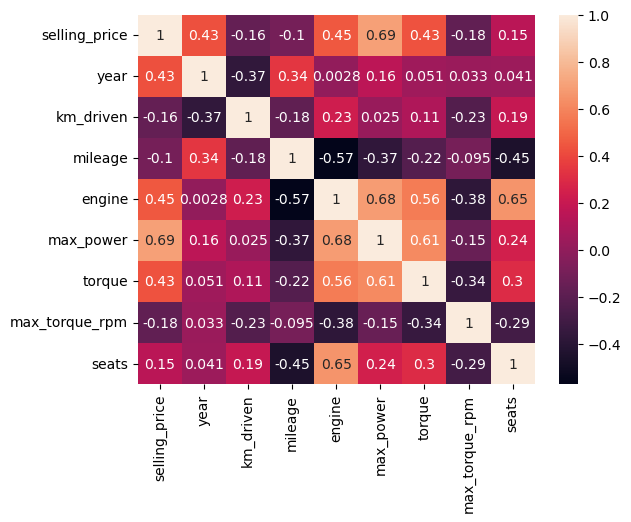

In [217]:
sns.heatmap(df_train.loc[:,  ['selling_price', 'year', 'km_driven', 'mileage', 'engine','max_power', 'torque', 'max_torque_rpm', 'seats']].corr() ,  annot=True);

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`Your answer here` Наименее скоррелированные признаки - это max_power и km_driven. Наиболее скоррелированы max_power и selling_price. Коррляция года и пробега отрицательна, поэтому, наверное, да. 

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ]

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [257]:
# your code here

def spearman_correlation(x, y):
    # Ранжирование значений
    rank_x = np.argsort(np.argsort(x))
    rank_y = np.argsort(np.argsort(y))
    
    # Вычисление коэффициента корреляции
    n = len(x)
    d = rank_x - rank_y  # разность рангов
    spearman_corr = 1 - (6 * np.sum(d ** 2)) / (n * (n**2 - 1))
    
    return spearman_corr



In [256]:
spearman_correlation(np.array([1, 2, 3, 4, 5]), np.array([5, 6, 7, 8, 7]))

0.9

In [260]:
def rank_with_ties(a):
    """ Присваивает ранги элементам массива, учитывая дубликаты. """
    sorted_indices = np.argsort(a)
    ranks = np.empty_like(sorted_indices, dtype=float)
    ranks[sorted_indices] = np.arange(1, len(a) + 1)  # Присваиваем ранги

    # Теперь обрабатываем дубликаты
    for start in range(len(a)):
        end = start
        while end < len(a) - 1 and a[sorted_indices[end]] == a[sorted_indices[end + 1]]:
            end += 1
        # Присваиваем средний ранг для дубликатов
        average_rank = np.mean(ranks[start:end + 1])
        ranks[start:end + 1] = average_rank
        start = end
     
    return ranks

def spearman_correlation(x, y):
    # Получаем ранги с учетом дубликатов
    rank_x = rank_with_ties(x)
    rank_y = rank_with_ties(y)
    
    # Вычисляем разность рангов
    n = len(x)
    d = rank_x - rank_y  # разность рангов
    d_squared_sum = np.sum(d ** 2)  # сумма квадратов разностей
    
    # Вычисляем коэффициент корреляции Спирмена
    spearman_corr = 1 - (6 * d_squared_sum) / (n * (n ** 2 - 1))
    
    return spearman_corr

# Пример использования
x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 6, 7, 8, 7])

correlation = spearman_correlation(x, y)
correlation

0.9

In [261]:
# Пример данных
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [5, 6, 7, 8, 7],
}

df = pd.DataFrame(data)

# Рассчет коэффициента корреляции Спирмена между столбцами A и B
spearman_corr = df['B'].corr(df['A'], method='spearman')

print(f"Коэффициент корреляции Спирмена между A и B: {spearman_corr}")


Коэффициент корреляции Спирмена между A и B: 0.8207826816681234


`Your answer here`
Различия в значениях, потому что в моей функции ранг для одинаковых элементов разный, а должен ыть средним. 

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [ ]:
# your code here

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [286]:
y_train = df_train['selling_price']# your code here
X_train = df_train.loc[:, ['km_driven', 'mileage', 'engine', 'max_power', 'torque','max_torque_rpm']]# your code here

In [287]:
assert X_train.shape == (5840, 6)

In [288]:
y_test =df_test['selling_price'] # your code here
X_test =df_test.loc[:, ['km_driven', 'mileage', 'engine', 'max_power', 'torque','max_torque_rpm']] # your code here

In [289]:
assert X_test.shape == (1000, 6)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [294]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here
model = LinearRegression()

model.fit(X_train, y_train)

pred_test = model.predict(X_test)
pred_train=model.predict(X_train)

print(f'''Metrics:
mse_test={MSE(y_test, pred_test)}
R2_test={r2_score(y_test, pred_test)}
mse_train={MSE(y_train, pred_train)}
R2_train={r2_score(y_train, pred_train)}
''')

Metrics:
mse_test=246230586706.5558
R2_test=0.5716451726496519
mse_train=130977831376.72285
R2_train=0.5430554331040374



Точность средненькая: R2 около 0.5

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [ ]:
def r_squared(y_true, y_pred):
    # Фактические значения
    y_true = np.array(y_true)
    # Предсказанные значения
    y_pred = np.array(y_pred)
    
    # Вычисляем среднее значение фактических значений
    y_mean = np.mean(y_true)
    
    # Сумма квадратов остатков
    ss_res = np.sum((y_true - y_pred) ** 2)
    
    # Сумма квадратов общего
    ss_tot = np.sum((y_true - y_mean) ** 2)
    
    # Вычисляем R^2
    r2 = 1 - (ss_res / ss_tot)
    
    return r2

`Your answer here`

ss_res - то, что модель не объясняет
ss_tot - общий разброс целевой переменной.

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [296]:
# your code here
def adjusted_r_squared(y_true, y_pred, p):
    #p - число предикторов
    # Фактические значения
    y_true = np.array(y_true)
    # Предсказанные значения
    y_pred = np.array(y_pred)
    
    # Количество наблюдений
    n = len(y_true)
    
    # Вычисляем среднее значение фактических значений
    y_mean = np.mean(y_true)
    
    # Сумма квадратов остатков
    ss_res = np.sum((y_true - y_pred) ** 2)
    
    # Сумма квадратов общего
    ss_tot = np.sum((y_true - y_mean) ** 2)
    
    # Вычисляем R^2
    r2 = 1 - (ss_res / ss_tot)
    
    # Вычисляем скорректированный R^2
    if n - p - 1 > 0:  # Проверка, чтобы избежать деления на 0
        r2_adjusted = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    else:
        r2_adjusted = float('nan')  # Если количество предикторов слишком велико
    
    return r2_adjusted

`Your answer here`
Скорректированный R2 нужен, чтобы наложить штраф за добавление лишних предикторов. Штраф нужен, так как добавление лишних предикторов может вести к переобучению модели. То есть основной смысл его использования состоит в сокращении использования предикторов.

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [299]:
from sklearn.preprocessing import StandardScaler

# your code here

scaler = StandardScaler()
scaler=scaler.fit(X_train)
X_train_scale=scaler.transform(X_train)
X_test_scale=scaler.transform(X_test)


model.fit(X_train_scale, y_train)

pred_test = model.predict(X_test_scale)
pred_train=model.predict(X_train_scale)

print(f'''Metrics:
mse_test={MSE(y_test, pred_test)}
R2_test={r2_score(y_test, pred_test)}
mse_train={MSE(y_train, pred_train)}
R2_train={r2_score(y_train, pred_train)}
''')

Metrics:
mse_test=246230586706.5562
R2_test=0.5716451726496512
mse_train=130977831376.72284
R2_train=0.5430554331040375



### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [309]:
# your code here
cdf = pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficients'])
print(cdf)
print('Наиболее информативным признаком оказалася max_power.')

                 Coefficients
km_driven      -100262.723213
mileage          88872.405786
engine           50761.785170
max_power       370540.438267
torque           -5412.840976
max_torque_rpm  -34686.521905
Наиболее информативным признаком оказалася max_power.


### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [314]:
from sklearn.linear_model import Lasso

# your code here
for a in np.arange(1e-5, 1.1+1e-5, 0.25):
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)

    y_pred_train = lasso.predict(X_train)
    y_pred_test = lasso.predict(X_test)

    print('alpha={}'.format(a))
    print('Train R2:', r2_score(y_train, y_pred_train))
    print('Test R2:', r2_score(y_test, y_pred_test))
    print(lasso.coef_,'\n')

alpha=1e-05
Train R2: 0.5430554331040374
Test R2: 0.5716451726493077
[-1.66920945e+00  2.22981972e+04  1.04529580e+02  1.17351803e+04
 -4.63152466e+01 -3.56392490e+01] 

alpha=0.25001
Train R2: 0.5430554331040115
Test R2: 0.5716451640621805
[-1.66920967e+00  2.22981681e+04  1.04529415e+02  1.17351799e+04
 -4.63151012e+01 -3.56392907e+01] 

alpha=0.50001
Train R2: 0.5430554331039337
Test R2: 0.5716451554750254
[-1.66920990e+00  2.22981390e+04  1.04529250e+02  1.17351795e+04
 -4.63149559e+01 -3.56393323e+01] 

alpha=0.75001
Train R2: 0.5430554331038037
Test R2: 0.5716451468878475
[-1.66921012e+00  2.22981100e+04  1.04529085e+02  1.17351790e+04
 -4.63148105e+01 -3.56393740e+01] 

alpha=1.00001
Train R2: 0.5430554331036219
Test R2: 0.571645138300648
[-1.66921035e+00  2.22980809e+04  1.04528921e+02  1.17351786e+04
 -4.63146651e+01 -3.56394156e+01] 



In [313]:
for a in np.arange(1e-5, 1.1+1e-5, 0.25):
    lasso = Lasso(alpha=a)
    lasso.fit(X_train_scale, y_train)

    y_pred_train = lasso.predict(X_train_scale)
    y_pred_test = lasso.predict(X_test_scale)

    print('alpha={}'.format(a))
    print('Train R2:', r2_score(y_train, y_pred_train))
    print('Test R2:', r2_score(y_test, y_pred_test))
    print(lasso.coef_,'\n')

alpha=1e-05
Train R2: 0.5430554331040375
Test R2: 0.5716451726395702
[-100262.72320175   88872.40576468   50761.78514239  370540.43824726
   -5412.8409409   -34686.52189611] 

alpha=0.25001
Train R2: 0.5430554331013835
Test R2: 0.5716449206086173
[-100262.44178408   88871.86233505   50761.10051178  370539.94669072
   -5411.97145289  -34686.2968332 ] 

alpha=0.50001
Train R2: 0.5430554330933376
Test R2: 0.5716446685557657
[-100262.16096344   88871.29845978   50760.38966266  370539.46329352
   -5411.10251203  -34686.0827863 ] 

alpha=0.75001
Train R2: 0.5430554330799842
Test R2: 0.5716444165132846
[-100261.87974507   88870.7481974    50759.69627117  370538.97446078
   -5410.23320513  -34685.86140423] 

alpha=1.00001
Train R2: 0.5430554330614692
Test R2: 0.5716441644877774
[-100261.59790982   88870.21901421   50759.02991004  370538.47721192
   -5409.36333042  -34685.62866403] 



Коэффициенты не занулились. С большой долей вероятности потому что немного признаков :))

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [ ]:
# your code here
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]  # Параметры alpha для тестирования
}

lasso = Lasso()

# Определение GridSearchCV с 10-кратной перекрестной проверкой
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scale, y_train)

# Лучшие параметры
best_alpha = grid_search.best_params_['alpha']
print("Лучший параметр alpha:", best_alpha)

Лучший параметр alpha: 200


In [320]:
best_lasso = Lasso(alpha=best_alpha)
best_lasso.fit(X_train_scale, y_train)

# Предсказание
pred_test = best_lasso.predict(X_test_scale)
pred_train = best_lasso.predict(X_train_scale)
# Оценка качества модели
print("R^2 (Train):", MSE(y_train, pred_train))
print("R^2 (Test):", r2_score(y_test, pred_test))

# Проверка на нулевые веса
zero_weights = np.sum(best_lasso.coef_ == 0)
print("Количество зануленных весов:", zero_weights)

# Вывод весов модели
print("Веса модели:", best_lasso.coef_)

R^2 (Train): 130978320195.86935
R^2 (Test): 0.5714429548556388
Количество зануленных весов: 0
Веса модели: [-100037.75795041   88433.31195672   50208.5894033   370148.91208646
   -4717.41359436  -34508.81040461]


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [321]:
# your code here
from sklearn.linear_model import ElasticNet

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],  # Параметр alpha для тестирования
    'l1_ratio': [0.1, 0.5, 0.9, 1]  # Параметр l1_ratio для тестирования
}

elastic_net = ElasticNet()

# Определение GridSearchCV с 10-кратной перекрестной проверкой
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scale, y_train)

# Лучшие параметры
best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

# Обучение модели с оптимальными параметрами
best_elastic_net = ElasticNet(alpha=best_params['alpha'], l1_ratio=best_params['l1_ratio'])
best_elastic_net.fit(X_train_scale, y_train)

# Предсказание
pred_test = best_elastic_net.predict(X_test_scale)
pred_train = best_elastic_net.predict(X_train_scale)

# Оценка качества модели
print("R^2 (Train):", r2_score(y_train, pred_train))
print("R^2 (Test):", r2_score(y_test, pred_test))

# Проверка на нулевые веса
zero_weights = np.sum(best_elastic_net.coef_ == 0)
print("Количество зануленных весов:", zero_weights)

# Вывод весов модели
print("Веса модели:", best_elastic_net.coef_)

Лучшие параметры: {'alpha': 0.1, 'l1_ratio': 0.9}
R^2 (Train): 0.5429545773876803
R^2 (Test): 0.5685919119014153
Количество зануленных весов: 0
Веса модели: [-99974.92888871  87335.55288615  52997.48950518 362818.65674886
  -1897.62345898 -33553.42234554]


### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [340]:
# your code here
from itertools import combinations
# 2. Функция для расчета AIC и BIC для многомерной регрессии
def calculate_aic_bic_multi(model, X, Y, alph):
    n, k = X.shape[0], X.shape[1]  # Число наблюдений и признаков
    n_targets =1  # Число целевых переменных
    y_pred = model.predict(X)
    residual_sum_of_squares = np.sum((Y - y_pred) ** 2)

    # Средняя ошибка для всех компонент целевой переменной
    mse = MSE(Y, y_pred, multioutput='uniform_average')
    log_likelihood = -n * n_targets / 2 * (np.log(2 * np.pi * mse) + 1)

    # Количество параметров = (число признаков + 1) * число целевых переменных
    total_params = n_targets * (k + 1)

    aic = alpha*2 * total_params - 2 * log_likelihood
    bic = total_params * np.log(n) - 2 * log_likelihood

    return aic, bic

# 3. Перебор комбинаций признаков для минимизации AIC/BIC
min_aic, min_bic = float('inf'), float('inf')
best_aic_model, best_bic_model = None, None

for num_features in range(1, len(X_train.columns) + 1):
    for feature_subset in combinations(X_train.columns, num_features):
        # Подготовка данных
        X_subset = X_train[list(feature_subset)].values
        Y_subset = y_train

        # Обучение модели
        model = LinearRegression()
        model.fit(X_subset, Y_subset)

        # Расчет AIC и BIC
        for alpha in [0.001, 0.01, 0.1, 0.5, 1, 10, 100 ]:
            aic, bic = calculate_aic_bic_multi(model, X_subset, Y_subset, alpha)
            # Обновление лучших моделей
            if aic < min_aic:
                min_aic = aic
                best_aic_model = (model, feature_subset, alpha)
            

            if bic < min_bic:
                min_bic = bic
                best_bic_model = (model, feature_subset, alpha)

# 4. Вывод результатов
print(f"Best AIC: {min_aic:.2f} using features {best_aic_model[1]} with alpha={best_aic_model[2]}")
print(f"Best BIC: {min_bic:.2f} using features {best_bic_model[1]}")


Best AIC: 166067.25 using features ('km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm') with alpha=0.001
Best BIC: 166119.99 using features ('km_driven', 'mileage', 'engine', 'max_power', 'max_torque_rpm')


# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [ ]:
# your code here

In [ ]:
assert X_train_cat.shape == (5840, 11)

In [ ]:
X_train_cat.describe(include='object')

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [ ]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

`Your answer here`

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [ ]:
# your code here
#Добавим квадрат года

y_train = df_train['selling_price']# your code here
X_train = df_train.loc[:, ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque','max_torque_rpm']]

X_test = df_test.loc[:, ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque','max_torque_rpm']]


X_train['year2']=X_train['year']**2
X_test['year2']=X_test['year']**2


model = LinearRegression()

model.fit(X_train, y_train)

pred_test = model.predict(X_test)
pred_train=model.predict(X_train)

print(f'''Metrics:
mse_test={MSE(y_test, pred_test)}
R2_test={r2_score(y_test, pred_test)}
mse_train={MSE(y_train, pred_train)}
R2_train={r2_score(y_train, pred_train)}
''')




Metrics:
mse_test=219533556923.4405
R2_test=0.6180886374379726
mse_train=107335206482.83194
R2_train=0.6255378568765739



In [368]:
#Попробуем заполнить пропукси средними, а не медианой!

df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')


a=df_train.loc[:, df_train.columns != 'selling_price'].duplicated()
b=[i for i in range(len(a)) if a[i]==True]

print(f'В датафрейме {len(b)} повторяющихся строк с признаками')

df_train.loc[b, :]


df_train=df_train.drop_duplicates(keep='first')


subset_columns = df_train.columns.difference(['selling_price']).tolist()

df_train = df_train.drop_duplicates(subset=subset_columns, keep='first')


df_train.reset_index(drop=True, inplace=True)

df_train['mileage'] = df_train['mileage'].str[:-5].astype(float)
df_train['engine'] = df_train['engine'].str[:-3].astype(float)
df_train['max_power'] = df_train['max_power'].str[:-4]
df_train['max_power']=df_train.loc[df_train['max_power']!='', ['max_power'] ].astype(float)

df_test['mileage'] = df_test['mileage'].str[:-5].astype(float)
df_test['engine'] = df_test['engine'].str[:-3].astype(float)
df_test['max_power'] = df_test['max_power'].str[:-4]
df_test['max_power']=df_test.loc[df_test['max_power']!='', ['max_power'] ].astype(float)

df_train['kgm'] = df_train['torque'].str.contains('kgm', na=False).astype(int)
df_test['kgm'] = df_test['torque'].str.contains('kgm', na=False).astype(int)
df_train['kgm']=df_train['kgm'].apply(lambda x: 1 if x==0  else 9.8)
df_test['kgm']=df_test['kgm'].apply(lambda x: 1 if x==0  else 9.8)
df_train['torque'] = df_train['torque'].str.replace(',', '', regex=False)
df_test['torque'] = df_test['torque'].str.replace(',', '', regex=False)

def replace_non_numeric(torque_str):
    if pd.isna(torque_str):
        return torque_str  # Оставляем NaN как есть
    return re.sub(r'[^0-9.]', 'a', torque_str)

#df=df_train
# Применяем функцию к столбцу torque
df_train['cleaned_torque'] = df_train['torque'].apply(replace_non_numeric)
df_test['cleaned_torque'] = df_test['torque'].apply(replace_non_numeric)


def extract_values(value_str):
    if pd.isna(value_str):
        return value_str  # О
    # Извлекаем все числа из строки
    numbers = re.findall(r'\d*\.\d+|\d+', value_str)
    
    if not numbers:
        return None, None

    # Преобразуем извлеченные числа в float
    numbers = list(map(float, numbers))

    # Первый элемент
    first_value = numbers[0]

    # Если есть только два значения, возвращаем их
    if len(numbers) == 2:
        second_value = numbers[1]
    # Если есть три значения, возвращаем среднее из второго и третьего
    elif len(numbers) == 3:
        second_value = (numbers[1] + numbers[2]) / 2
    else:
        second_value = None  # Если значений не хватает, возвращаем None

    return first_value, second_value


# Применяем функцию к столбцу values и создаём новые столбцы
df_train[['torque', 'max_torque_rpm']] = df_train['cleaned_torque'].apply(extract_values).apply(pd.Series)
df_test[['torque', 'max_torque_rpm']] = df_test['cleaned_torque'].apply(extract_values).apply(pd.Series)
df_train.drop('cleaned_torque', axis=1, inplace=True)
df_test.drop('cleaned_torque', axis=1, inplace=True)
df_train['torque']=df_train['torque']*df_train['kgm']
df_test['torque']=df_test['torque']*df_test['kgm']
df_train.drop('kgm', axis=1, inplace=True)
df_test.drop('kgm', axis=1, inplace=True)




В датафрейме 1159 повторяющихся строк с признаками


In [369]:
df_train[df_train.select_dtypes(include='number').columns] = df_train.select_dtypes(include='number').fillna(df_train[df_train.select_dtypes(include='number').columns].mean())
means = df_train[df_train.select_dtypes(include='number').columns].mean()
df_test[df_test.select_dtypes(include='number').columns] = df_test.select_dtypes(include='number').fillna(means)

In [397]:
import joblib 

y_train = df_train['selling_price']# your code here
X_train = df_train.loc[:, ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque','max_torque_rpm']]

X_test = df_test.loc[:, ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque','max_torque_rpm']]


X_train['year2']=X_train['year']**2
X_test['year2']=X_test['year']**2


model = LinearRegression()

model.fit(X_train, y_train)

pred_test = model.predict(X_test)
pred_train=model.predict(X_train)

joblib.dump(model, "final_model.pkl")


print(f'''Metrics:
mse_test={MSE(y_test, pred_test)}
R2_test={r2_score(y_test, pred_test)}
mse_train={MSE(y_train, pred_train)}
R2_train={r2_score(y_train, pred_train)}
''')

Metrics:
mse_test=220415968241.19608
R2_test=0.6165535513516951
mse_train=107589031215.2564
R2_train=0.6246523342564019



In [398]:
X_train

year  km_driven  mileage  engine  max_power  torque  max_torque_rpm  \
0     2014     145500    23.40  1248.0      74.00  190.00          2000.0   
1     2014     120000    21.14  1498.0     103.52  250.00          2000.0   
2     2010     127000    23.00  1396.0      90.00  219.52          2250.0   
3     2007     120000    16.10  1298.0      88.20  112.70          4500.0   
4     2017      45000    20.14  1197.0      81.86  113.75          4000.0   
...    ...        ...      ...     ...        ...     ...             ...   
5835  2008     191000    17.92  1086.0      62.10   96.10          3000.0   
5836  2013      50000    18.90   998.0      67.10   90.00          3500.0   
5837  2013     110000    18.50  1197.0      82.85  113.70          4000.0   
5838  2007     119000    16.80  1493.0     110.00  235.20          2325.0   
5839  2009     120000    19.30  1248.0      73.90  190.00          2000.0   

        year2  
0     4056196  
1     4056196  
2     4040100  
3     4028049  
4     4068289  
...       ...  
5835  4032064  
5836  4052169  
5837  4052169  
5838  4028049  
5839  4036081  

[5840 rows x 8 columns]

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [389]:
def business_metrics(y_true, y_pred):
    # your code here
  x=abs(y_true/y_pred*100-100)
  z = np.where(x <= 10, 1, 0)

  return np.mean(z)

# Вообще говоря наилучшей моделью была та, что оценивалась в Feature Engeineering, для последней и оценим.  
business_metrics(y_test,pred_test )

0.221

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [396]:
# Вообще MAPE относится к перепрогнозу хуже, чем к недопрогнозу, поэтому использкуем его, но изменим формсулу в числителе, чтобы нелопрогноз был хуже. 

def your_business_metrics(y_true, y_pred):
    err=np.mean(abs(pred_test-y_test)/abs(y_test))
    return np.mean(err)

your_business_metrics(y_test,pred_test )

0.5739898945853555

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()

model = joblib.load("final_model.pkl")

class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>